In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
from collections import Counter
from itertools import combinations
import numpy as np
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.utils.validation import check_random_state
from src.model import boosted_support_subset
from mlxtend.plotting import plot_decision_regions

In [4]:
def _support_subset_estimation(sample, target, clf, prop=1):


        # Evaluación de distancia al hiperplano
        decision_function_values = clf.decision_function(sample)
        
        # Índices de los vectores soporte
        alphas_index = clf.support_
        
        # Identificación de los vectores soporte
        pos_support = alphas_index[np.where(decision_function_values[alphas_index] > 0)]
        neg_support = alphas_index[np.where(decision_function_values[alphas_index] < 0)]
        decision_function_values[pos_support] = float("inf")
        decision_function_values[neg_support] = float("-inf")
        
        # Conteo de vectores soporte según clase
        nsv_class = Counter(target[alphas_index])
        
        # Tamaño muestra de los sunconjuntos positivo y negativo
        samp_prop = [prop * nsv_class[i] for i in nsv_class]
        
        # Definición de subconjuntos positivo y negativo
        pos_values = np.where(decision_function_values>0)[0]
        neg_values = np.where(decision_function_values<0)[0]
        x_pos = pos_values[(decision_function_values[pos_values]).argsort().argsort()<samp_prop[1]]
        x_neg = neg_values[((-1)*decision_function_values[neg_values]).argsort().argsort()<samp_prop[-1]]
            
        return nsv_class, x_pos, x_neg, alphas_index

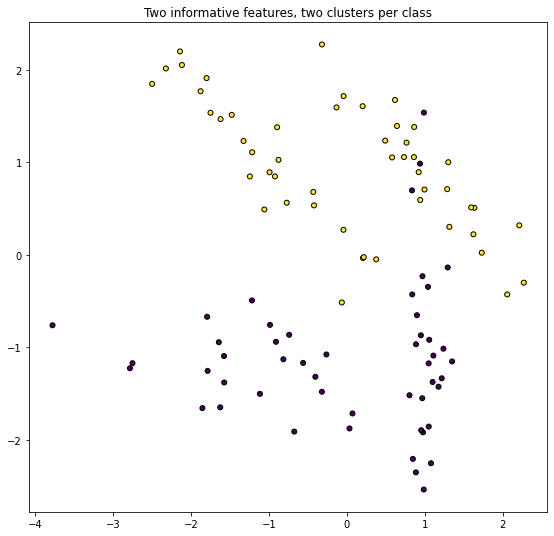

In [5]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles

plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)

plt.title("Two informative features, two clusters per class", fontsize="large")
X, Y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1234)
plt.scatter(X[:, 0], X[:, 1], marker="o", c=Y, s=25, edgecolor="k");

In [31]:
def _kmeans_sample(data_train, target, n_clusters=10, random_state=1234):
    
        kmeans = KMeans(n_clusters=n_clusters, random_state=random_state).fit(data_train)
        
        partition_idx = []
        
        for i in range(1000):
            
            sample_seed = random_state + i
            
            random_instance = check_random_state(sample_seed)
            
            sample_cluster = random_instance.choice(range(n_clusters), size=2, replace=True)
            
            mask = np.isin(kmeans.labels_, sample_cluster)
            print(sample_cluster)
            classes_condition = len(np.unique(target[mask]))<2
            
            if not classes_condition:
                partition_idx.append(np.where(mask)[0])
                feature_space_condition = len({x for l in partition_idx for x in l})
                if not feature_space_condition < len(data_train):
                    break             
        return partition_idx

In [18]:
len(X)

100

In [16]:
len(region_active_idx)

22

In [46]:
clf = SVC(kernel="linear", C=1)

In [47]:
clf.fit(X, Y)

SVC(C=1, kernel='linear')

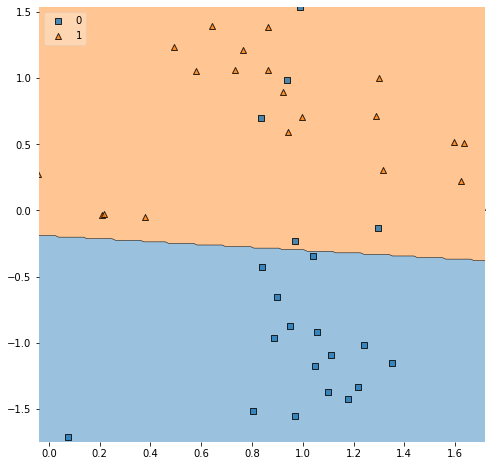

In [62]:
plt.figure(figsize=(8, 8))

xlim = [X[0].min(), X[0].max()]
ylim = [X[1].min(), X[1].max()]

plot_decision_regions(X, Y, clf=clf, legend=2)

plt.xlim(xlim)
plt.ylim(ylim)

plt.show()

In [55]:
nsv_class, x_pos, x_neg, alphas_index = _support_subset_estimation(X, Y, clf, prop=1)

In [64]:
nsv_class

Counter({0: 13, 1: 12})

In [56]:
ss_estimated = np.hstack([x_pos, x_neg, alphas_index])

In [57]:
clf_ss = SVC(kernel="linear", C=1)

In [58]:
clf_ss.fit(X[ss_estimated], Y[ss_estimated])

SVC(C=1, kernel='linear')

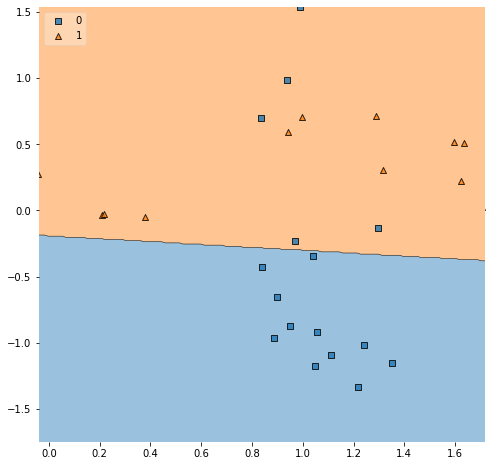

In [63]:
plt.figure(figsize=(8, 8))

plot_decision_regions(X[ss_estimated], Y[ss_estimated], clf=clf_ss, legend=2)

plt.xlim(xlim)
plt.ylim(ylim)

plt.show()

In [28]:
def _kmeans_sample(data_train, target, n_clusters=2, random_state=1234):

    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state).fit(data_train)

    partition_idx = []

    for i in combinations(kmeans.labels_, 2):

        mask = np.isin(kmeans.labels_, i)

        classes_condition = len(np.unique(target[mask]))<2

        if not classes_condition:
            partition_idx.append(np.where(mask)[0])

    return partition_idx

In [29]:
partition_idx = _kmeans_sample(X, Y)

In [62]:
kmeans = KMeans(n_clusters=3, random_state=1234).fit(X)

partition_idx = []

for i in list(combinations(range(3), 2)):
    print(i)
    mask = np.isin(kmeans.labels_, i)

    classes_condition = len(np.unique(Y[mask]))<2

    if not classes_condition:
        partition_idx.append(np.where(mask)[0])

(0, 1)
(0, 2)
(1, 2)


In [64]:
partition_idx

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 13, 15, 16, 17, 18, 20, 22, 24,
        25, 26, 27, 28, 29, 30, 31, 33, 34, 36, 37, 39, 40, 42, 43, 44, 45,
        46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 64, 65, 66,
        67, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 82, 84, 85, 86, 87,
        88, 89, 90, 91, 92, 93, 95, 96, 97, 98, 99]),
 array([ 2,  4,  6,  9, 10, 11, 12, 14, 15, 18, 19, 20, 21, 23, 24, 27, 28,
        30, 32, 34, 35, 36, 38, 39, 41, 44, 49, 50, 51, 53, 54, 57, 59, 60,
        61, 62, 63, 65, 66, 68, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81,
        82, 83, 84, 85, 86, 87, 88, 89, 91, 94, 95, 98, 99]),
 array([ 0,  1,  3,  5,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 19, 21, 22,
        23, 25, 26, 29, 31, 32, 33, 35, 37, 38, 40, 41, 42, 43, 45, 46, 47,
        48, 52, 54, 55, 56, 58, 61, 62, 63, 64, 67, 68, 69, 72, 74, 81, 83,
        90, 92, 93, 94, 96, 97])]

In [6]:
params = {'C': 1, 'gamma': 10}

In [7]:
search_best = any([isinstance(i, list) for i in params.values()])

In [8]:
search_best

False